# Plot bike usage on map

In [7]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (8,6)

import contextlib
import urllib
from lxml import etree
import datetime
import pandas as pd
import time
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

## Import existing bikedata file from csv

In [6]:
bikedata = pd.DataFrame.from_csv('bikelog_100215.csv')
bikedata.head()

,Colleges of the Fenway,Tremont St. at Berkeley St.,Northeastern U / North Parking Lot,Cambridge St. at Joy St.,Fan Pier,Union Square - Brighton Ave. at Cambridge St.,Agganis Arena - 925 Comm Ave.,B.U. Central - 725 Comm. Ave.,Longwood Ave / Binney St,Ruggles Station / Columbus Ave.,...,Dana Park,Danehy Park,Kendall Street,Alewife Station at Russell Field,EF - North Point Park,Rindge Avenue - O'Neill Library,Harvard University Transportation Services - 175 North Harvard St,State Street at Channel Center,John F Fitzgerald - Surface Road at India Street,Ink Block
2015-10-02 10:46:40.589,2,5,3,1,7,10,16,10,8,10,...,3,7,13,16,7,10,11,3,12,4
2015-10-02 10:47:40.689,2,5,3,1,8,10,16,10,8,10,...,3,8,13,16,7,10,11,3,12,4
2015-10-02 10:48:40.789,2,5,3,1,8,10,16,10,8,10,...,3,8,13,16,7,10,11,3,12,4
2015-10-02 10:49:40.891,2,5,3,1,8,10,16,11,8,10,...,3,8,13,16,7,10,11,3,12,4
2015-10-02 10:50:41.005,2,5,3,0,8,10,16,11,8,10,...,2,8,13,16,7,10,11,3,12,4


In [10]:
# grab XML file for lat/long and capacity
def getupdate():
    u = 'http://www.thehubway.com/data/stations/bikeStations.xml'
    # tweak of urlopen from hubway_repeatingquery, see http://stackoverflow.com/a/1522709
    with contextlib.closing(urllib.urlopen(u)) as x:
        data = etree.parse(x)
    stations = data.findall('station')
    everything = [[elt.text for elt in station.getchildren()] for station in stations]
    df = pd.DataFrame(everything, columns = [elt.tag for elt in data.find('station')]).convert_objects(convert_numeric=True)
    df.set_index('name', inplace=True)
    return df
df = getupdate()
df['capacity'] = df['nbBikes'] + df['nbEmptyDocks']

In [24]:
df.head()

,id,terminalName,lastCommWithServer,lat,long,installed,locked,installDate,removalDate,temporary,public,nbBikes,nbEmptyDocks,latestUpdateTime,capacity
name,,,,,,,,,,,,,,,
Colleges of the Fenway,3,B32006,1443811563723,42.340021,-71.100812,true,false,0,None,false,true,6,8,1443810819203,14
Tremont St. at Berkeley St.,4,C32000,1443811478816,42.345392,-71.069616,true,false,0,None,false,true,5,10,1443807822559,15
Northeastern U / North Parking Lot,5,B32012,1443811486285,42.341814,-71.090179,true,false,0,None,false,true,6,9,1443811247668,15
Cambridge St. at Joy St.,6,D32000,1443811561256,42.361174,-71.065142,true,false,0,None,false,true,4,11,1443810828318,15
Fan Pier,7,A32000,1443811570530,42.353287,-71.044389,true,false,0,None,false,true,11,2,1443811569949,13


In [21]:
bikedata.ix[-1,'Fan Pier']

11

In [49]:
df.capacity*0.4

name
Colleges of the Fenway                                                    5.6
Tremont St. at Berkeley St.                                               6.0
Northeastern U / North Parking Lot                                        6.0
Cambridge St. at Joy St.                                                  6.0
Fan Pier                                                                  5.2
Union Square - Brighton Ave. at Cambridge St.                             6.0
Agganis Arena - 925 Comm Ave.                                             7.6
B.U. Central - 725 Comm. Ave.                                             4.4
Longwood Ave / Binney St                                                  5.6
Ruggles Station / Columbus Ave.                                           6.0
Boston Medical Center -  East Concord at Harrison Ave                     7.6
HMS / HSPH - Ave. Louis Pasteur at Longwood Ave.                          6.4
Harvard Real Estate - Brighton Mills - 370 Western Ave     

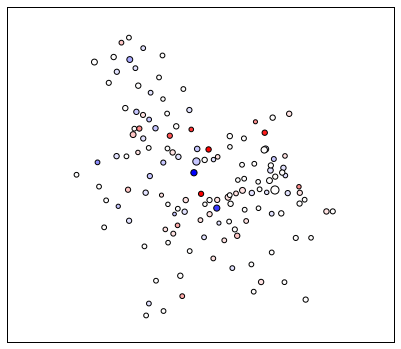

In [54]:
x,y = hub_map(df.long.values, df.lat.values)
bikechange = (bikedata.iloc[-1] - bikedata.iloc[0]).values
plot_handle = hub_map.scatter(x, y, c=bikechange, cmap = 'bwr',
                  s = (df.capacity * 1.5).values)

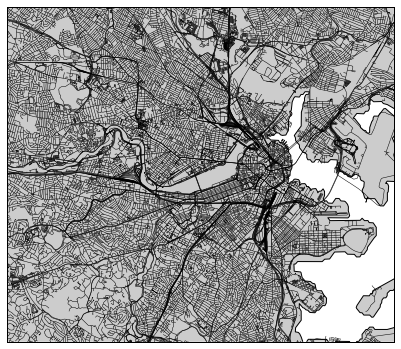

In [56]:
hub_map = Basemap(projection='merc', lat_0 = 42.34, lon_0 = -71.10,
    resolution = 'f', area_thresh = 0.1,
    llcrnrlon=-71.18, llcrnrlat=42.30,
    urcrnrlon=-71.00, urcrnrlat=42.415)
hub_map.readshapefile('../../../Documents/boston_massachusetts_osm_roads','roads')
hub_map.drawcoastlines()
hub_map.fillcontinents()
hub_map.drawmapboundary()
x,y = hub_map(df.long.values, df.lat.values)
bikechange = (bikedata.iloc[-1] - bikedata.iloc[0]).values
hub_map.scatter(x, y, c=bikechange, cmap = 'bwr',
                  s = (df.capacity * 1.5).values)

why is the scatterplot not appearing above??

In [ ]:
# try to be able to preserve underlying map, http://stackoverflow.com/a/11172072

plot_handle, = self.map.plot(x,y,'ro') 
# When changing the data, change the xdata and ydata and redraw
plot_handle.set_ydata(new_y)
plot_handle.set_xdata(new_x)
hub_map.figure.canvas.draw()